In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('../../data/combined/005500.csv', index_col=0)
dates = df.index
df.shape

(1364, 3)

In [94]:
dates

Index(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
       '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09', '2016-01-10',
       ...
       '2019-09-16', '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
       '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25'],
      dtype='object', name='period', length=1364)

In [95]:
scaled = df-df.min()
scaled /= scaled.max()

In [96]:
scaled.head()

,price,volume,ratio
period,,,
2016-01-01,0.019635,0.056674,0.002589
2016-01-02,0.019635,0.056674,0.002627
2016-01-03,0.019635,0.056674,0.002950
2016-01-04,0.000000,0.032562,0.038238
2016-01-05,0.046283,0.108598,0.035973


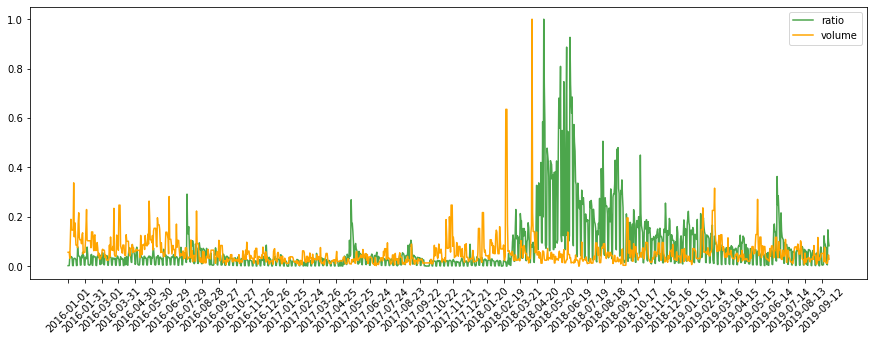

In [145]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(dates,scaled['ratio'], label="ratio", color='green', alpha=0.7)
# ax.plot(dates,scaled['price'], label="price", color='blue', alpha=0.7)
ax.plot(dates,scaled['volume'], label="volume", color='orange')
ax.set_xticks(dates[::30])
ax.set_xticklabels(dates[::30], rotation=45)
ax.legend()

In [102]:
len(scaled['ratio'])

1364

In [117]:
scaled['price'].values[700:]

array([0.42496494, 0.42496494, 0.42496494, 0.42636746, 0.41654979,
       0.40252454, 0.37307153, 0.36886396, 0.36886396, 0.36886396,
       0.37587658, 0.37026648, 0.40392707, 0.41374474, 0.40953717,
       0.40953717, 0.40953717, 0.40112202, 0.3884993 , 0.37447405,
       0.36605891, 0.37307153, 0.37307153, 0.37307153, 0.37307153,
       0.37026648, 0.36185133, 0.37307153, 0.37307153, 0.37307153,
       0.37307153, 0.37307153, 0.37307153, 0.36886396, 0.35624123,
       0.42075736, 0.42075736, 0.42075736, 0.41795231, 0.39691445,
       0.38990182, 0.3997195 , 0.45862553, 0.45862553, 0.45862553,
       0.457223  , 0.43618513, 0.44740533, 0.43899018, 0.41514727,
       0.41514727, 0.41514727, 0.42917251, 0.43197756, 0.44460028,
       0.45301543, 0.48807854, 0.48807854, 0.48807854, 0.50350631,
       0.52734923, 0.49368864, 0.49368864, 0.47265077, 0.47265077,
       0.47265077, 0.47124825, 0.44460028, 0.46563815, 0.46143058,
       0.45301543, 0.45301543, 0.45301543, 0.50350631, 0.45441

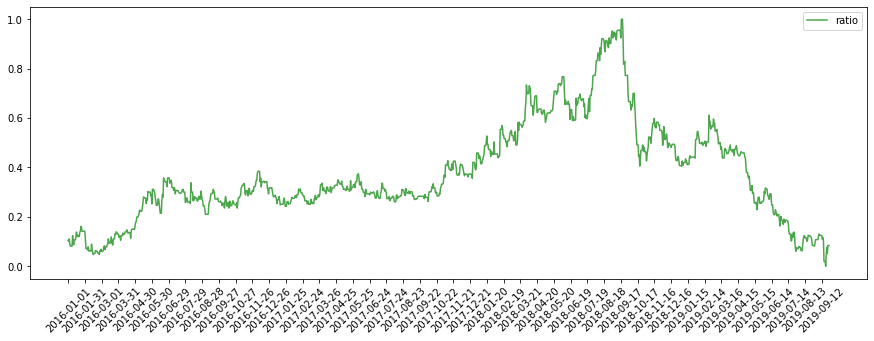

In [120]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(dates,lagged_scaled, label="ratio", color='green', alpha=0.7)
ax.set_xticks(dates[::30])
ax.set_xticklabels(dates[::30], rotation=45)
ax.legend()

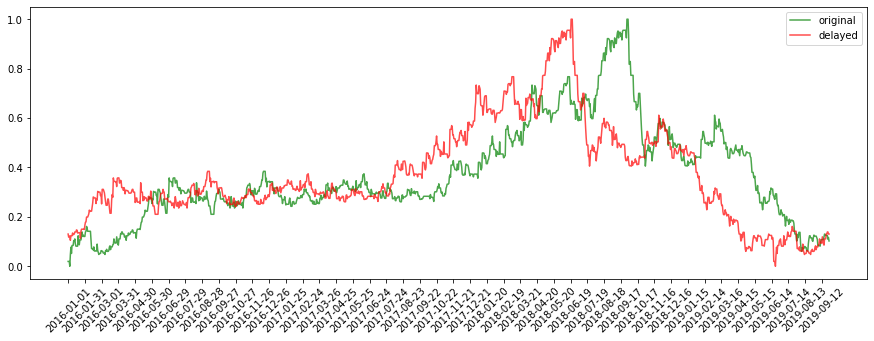

In [142]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
first = list(scaled['price'].values[100:])
second = list(scaled['price'].values[:100])
lagged_scaled = first + second
ax.plot(dates,scaled['price'], label="original", color='green', alpha=0.7)
ax.plot(dates,lagged_scaled, label="delayed", color='red', alpha=0.7)
ax.set_xticks(dates[::30])
ax.set_xticklabels(dates[::30], rotation=45)
ax.legend()

In [143]:
df1= pd.DataFrame(data={'s1':scaled['price'], 's2': lagged_scaled })
df1.head()
df1.corr()

,s1,s2
s1,1.000000,0.657097
s2,0.657097,1.000000


In [130]:
s1 = pd.Series([.2, .0, .6, .2])
s2 = pd.Series([.3, .6, .0, .1])
s1.corr(s2)

-0.85106449634699

In [146]:
pct = df.pct_change()
pct = pct.abs()
pct.head()
pct = pct.replace([np.inf, -np.inf], np.nan)
pct = pct.dropna()
pct_dates = pct.index

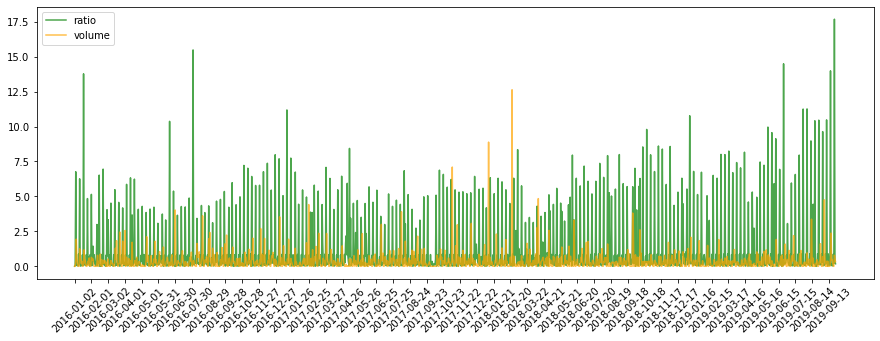

In [147]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(pct_dates,pct['ratio'], label="ratio", color='green', alpha=0.7)
# ax.plot(pct_dates,pct['price'], label="price", color='blue')
ax.plot(pct_dates,pct['volume'], label="volume", color='orange',alpha=0.7)
ax.set_xticks(pct_dates[::30])
ax.set_xticklabels(pct_dates[::30], rotation=45)
ax.legend()